<img src="https://pbs.twimg.com/profile_images/378800000821059424/a3ea6fbe81395f9bccb79026fdbd18f5_400x400.png " alt="Fulford Maths" style="width: 120px; float: right"/>
# Running student level analysis

* Scroll down to the "Select a class here..." cell and select the desired class.
* Select a pupil from the displayed dataframe.
* Select "Cell", "Run All" from the menu bar to begin default analysis

In [154]:
# This snippet will hide/show all of the  code cells to make this easier to read!
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code cell visibility"></form>''')

In [155]:
# Importing required modules and functions
from ClMATE_analysis_functions import *

%pylab inline

# Core imports
from collections import namedtuple
import pandas as pd
import numpy as np
import sqlite3
import pdfkit
import os

# Plotting
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('notebook', font_scale=1.5)

#Dynamic JavaScript based Plotting is possible through Lightning:
#from lightning import Lightning
#lgn = Lightning(ipython=True, host='http://public.lightning-viz.org') #local=True) #

# Stop warnings from being displayed inline
import warnings
warnings.filterwarnings('ignore')

# Show available plot rendering styles
#print("The following plot styles are available:\n{}".format(", ".join(plt.style.available)))
# See output at the bottom of this cell for alternative plot styles and change this here if desired.
#plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [156]:
# Generate the MASTER dataframe that will be sliced and regrouped from now on
foundation_sets = ['11-CCL', '11-MD']
higher_sets = ['11-PG', '11-DBY', '11-HH', '11-AR', '11-AK', '11-IM']

selected_classes = foundation_sets
_masterDF = get_master_dataframe(selected_classes)

# The following pupils did NOT sit the test and need to be removed from the analysis
non_sitters = ['Gurney, Connor Andrew', 'Nicholson, Kate Louise Rachel', 'Beal, Rachel Ellie', 'Li, Ricky Rui-Qi']
masterDF = _masterDF[[x not in non_sitters for x in _masterDF['Name']]]
masterDF.replace(to_replace='n/a', value='C', inplace=True)
masterDF.replace(to_replace='None', value='C', inplace=True)
masterDF.set_index(['tSet', 'Name'], inplace=True)


Data fetched for the following assessments
	58: Year 11 December Non-Calculator Mock 2015 (F)
	59: Year 11 December Calculator Mock 2015 (F)


In [279]:
from IPython.html.widgets.widget_selection import Dropdown
from collections import OrderedDict

selected_class = '11-MD'
classDF = masterDF.loc[selected_class]
classDF = classDF[classDF['topic']!='DELETE ME    I AM AN EXTRA QUESTION']

pupil_selector = Dropdown(options=OrderedDict(zip(classDF.index.unique(), classDF.index.unique())))
print("Select a student")
pupil_selector

Select a student


In [300]:
selected_student = pupil_selector.selected_label
pupilDF = classDF.loc[selected_student]

# Performance by topic

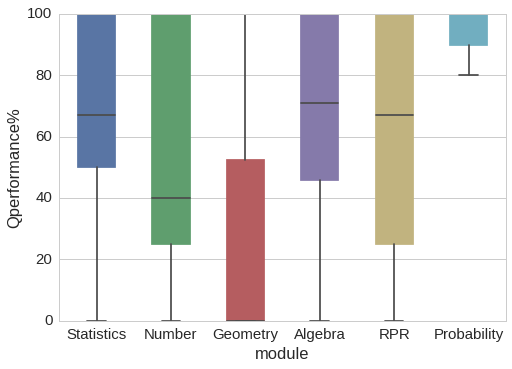

In [301]:
sns.boxplot(x='module', y='Qperformance%', data=pupilDF, width=0.5)

In [302]:
byQuestionDF = classDF.groupby(by=['aID', 'qNum']).sum()[['mark', 'total']]
byQuestionDF['class%'] = np.round(byQuestionDF['mark'] / byQuestionDF['total'] * 100, 2)
byQuestionDF = byQuestionDF[['class%']]
byQuestionDF.reset_index(inplace=True)
pupilDF = pd.merge(pupilDF, byQuestionDF, on=['aID', 'qNum'])
#pupilDF.head()

# Performance by question

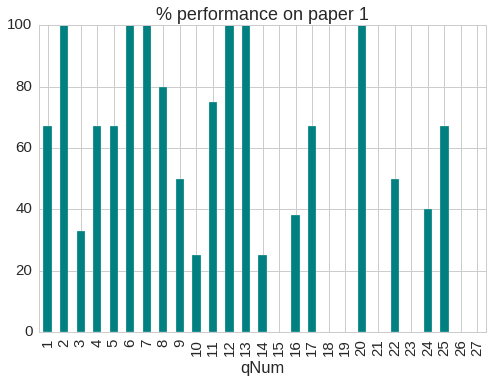

In [303]:
pupilDF[pupilDF.aID==58].plot(kind='bar',
                              x='qNum',
                              y='Qperformance%',
                              color='#008080',
                              legend=False,
                              title='% performance on paper 1')

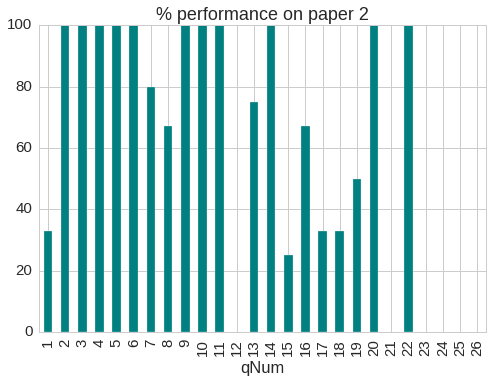

In [304]:
pupilDF[pupilDF.aID==59].plot(kind='bar',
                              x='qNum',
                              y='Qperformance%',
                              color='#008080',
                              legend=False,
                              title='% performance on paper 2')

# Vs class average for each question

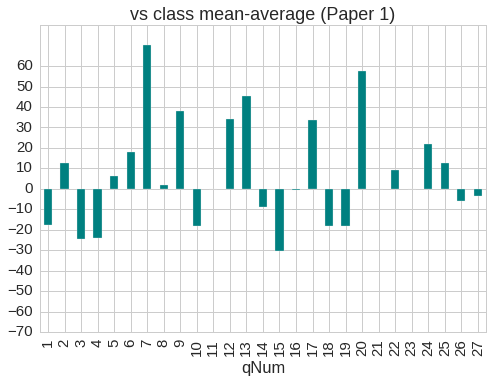

In [305]:
pupilDF['diff'] = pupilDF['Qperformance%'] - pupilDF['class%']
pupilDF[pupilDF.aID==58].plot(kind='bar',
            x='qNum',
            y='diff',
            color='#008080',
            title='vs class mean-average (Paper 1)',
            legend=False,
            yticks=[x for x in range(-70, 70, 10)])

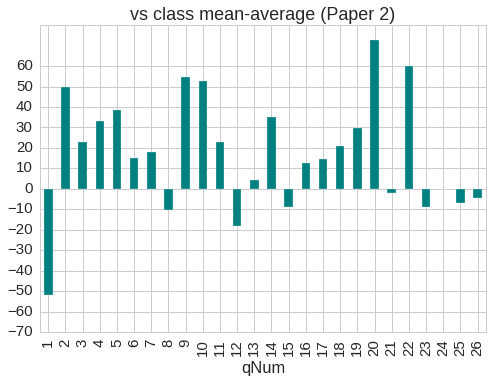

In [306]:
pupilDF['diff'] = pupilDF['Qperformance%'] - pupilDF['class%']
pupilDF[pupilDF.aID==59].plot(kind='bar',
            x='qNum',
            y='diff',
            color='#008080',
            title='vs class mean-average (Paper 2)',
            legend=False,
            yticks=[x for x in range(-70, 70, 10)])

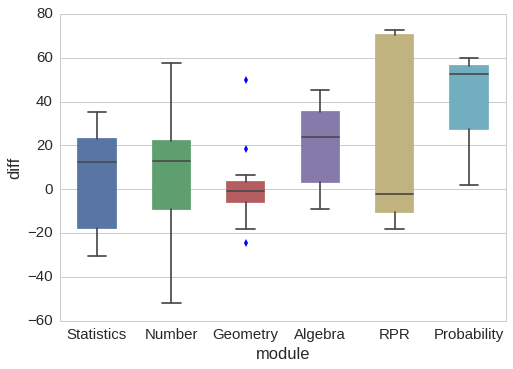

In [307]:
sns.boxplot(x='module', y='diff', data=pupilDF, width=0.5)

# Top and bottom questions

In [308]:
top_10 = pupilDF.sort_values(by='Qperformance%', ascending=False)
top_10.set_index('topic', inplace=True)
top_10[['module', 'Qperformance%', 'class%']][0:11]

,module,Qperformance%,class%
topic,,,
Addition & subtraction based on info in 3 steps,Number,100,84.85
Averages and range,Statistics,100,64.94
Simple interest,RPR,100,27.27
"Probability for 2 way table; decimal probability, total = 1",Probability,100,40.00
Adding fractions & fraction of an amount,Number,100,42.42
Probability; 1 number as percentage of another,Probability,100,47.27
Analysis of dual bar chart,Statistics,100,77.27
"Fraction & percent shaded, equivalent fractions",Number,100,87.27
Solve simple equations,Algebra,100,54.55


In [309]:
bottom_10 = pupilDF.sort_values(by='Qperformance%', ascending=True)
bottom_10.set_index('topic', inplace=True)
bottom_10[['module', 'Qperformance%', 'class%']][0:11]

,module,Qperformance%,class%
topic,,,
Area of compound shape; cost of tiles; % descrease,Geometry,0,3.64
"Shaded region - bisect a line, radius from a point, scales",Geometry,0,0.00
Form & solve equation,Algebra,0,9.09
Ratio & proportion including decimals,RPR,0,2.27
Cost based on elec meter readings & price per unit,Number,0,18.18
Circumference of a circle,Geometry,0,6.82
LCM,Number,0,6.06
Factorising; simplify with indices,Algebra,0,0.00
Volume of cuboids,Geometry,0,0.00
